In [39]:
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error

from io import StringIO
from IPython.display import Image, display
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeRegressor, DecisionTreeClassifier


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
from joblib import dump
import joblib

import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv("D:/Advanced Machine Learining Project/Dataset/loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [41]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df.drop('loan_id',axis=1 ,inplace=True)

In [44]:
df.dtypes

 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [45]:
# Removing whitespaces from column names
df.columns = df.columns.str.strip()

# Removing white spaces from values in the dataframe
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [46]:
df.self_employed.value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [47]:
df.education.value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [48]:
df.loan_status.value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [49]:
# to convert object to int
df["self_employed"] = df["self_employed"].apply(lambda x: 1 if x == "Yes" else 0)
df["education"] = df["education"].apply(lambda x: 1 if x == "Graduate" else 0)
df["loan_status"] = df["loan_status"].apply(lambda x: 1 if x == "Approved" else 0)

In [50]:
df["loan_status"].unique()

array([1, 0], dtype=int64)

In [51]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


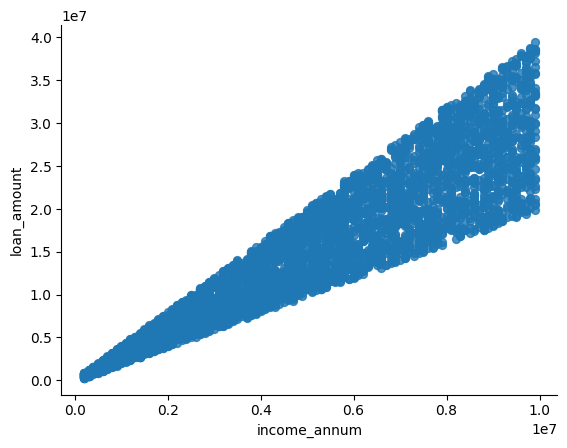

In [52]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='income_annum', y='loan_amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [54]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [55]:
x=df.drop(['loan_status'], axis=1)
y=df['loan_status']

In [56]:
np.unique(y)

array([0, 1], dtype=int64)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_path = "scaler.joblib"
dump(scaler, model_path)

['scaler.joblib']

In [58]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3415, 11)
Shape of X_test: (854, 11)
Shape of y_train: (3415,)
Shape of y_test: (854,)


In [59]:
svc = SVC(kernel="linear")

svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

Accuracy: 0.9168618266978923


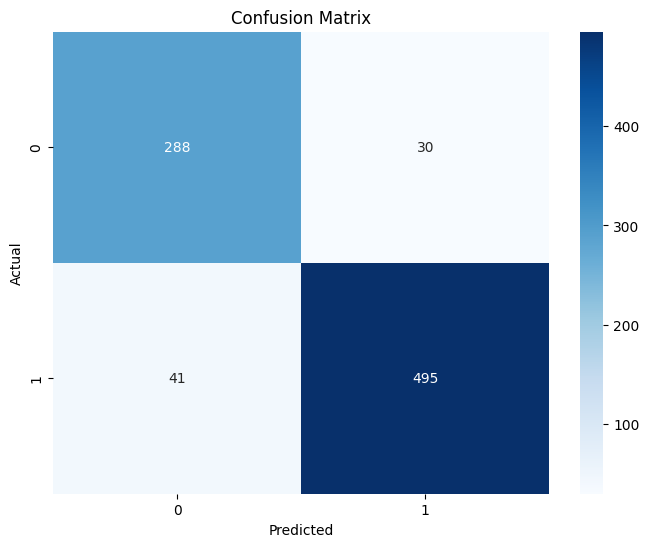

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       318
           1       0.94      0.92      0.93       536

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



In [60]:
print("Accuracy:", accuracy_score(y_test, y_pred))
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

In [61]:
#Finding the best parameters for Supported Vector classifiar model using grid_search
param_grid = {
    'C': [1, 10, 100],  # Penalty parameter C
    'gamma': [1, 0.1, 0.01],  # Kernel coefficient for 'rbf'
    'kernel': ['rbf','linear' ,'sigmoid']  # Kernel type
}

# Grid Search Cross Validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params_grid = grid_search.best_params_
print("Best hyperparameters:", best_params_grid)

# Train SVM model with best hyperparameters
best_svm_grid = SVC(**best_params_grid)
best_svm_grid.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = best_svm_grid.score(X_test_scaled, y_test)
print("Accuracy on test set:", accuracy)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy on test set: 0.9391100702576113


In [62]:
# Define the distribution of hyperparameters for Randomized Search
param_distributions = {
    'C': loguniform(1e-4, 1e4),  # Penalty parameter C (log scale)
    'gamma': loguniform(1e-4, 1e4),  # Kernel coefficient for 'rbf' (log scale)
    'kernel': ['rbf','sigmoid']  # Kernel type
}

# Randomized Search Cross Validation to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, n_iter=100,
                                   cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params_rdm = random_search.best_params_
print("Best hyperparameters:", best_params_rdm)

# Train SVC model with best hyperparameters
best_svc_rdm = SVC(**best_params_rdm)
best_svc_rdm.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = best_svc_rdm.score(X_test_scaled, y_test)
print("Accuracy on test set:", accuracy)

from joblib import dump

model_path = "random_search_svm.joblib"
dump(random_search, model_path)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'C': 293.21000471832986, 'gamma': 0.02734702913886812, 'kernel': 'rbf'}
Accuracy on test set: 0.9449648711943794


['random_search_svm.joblib']

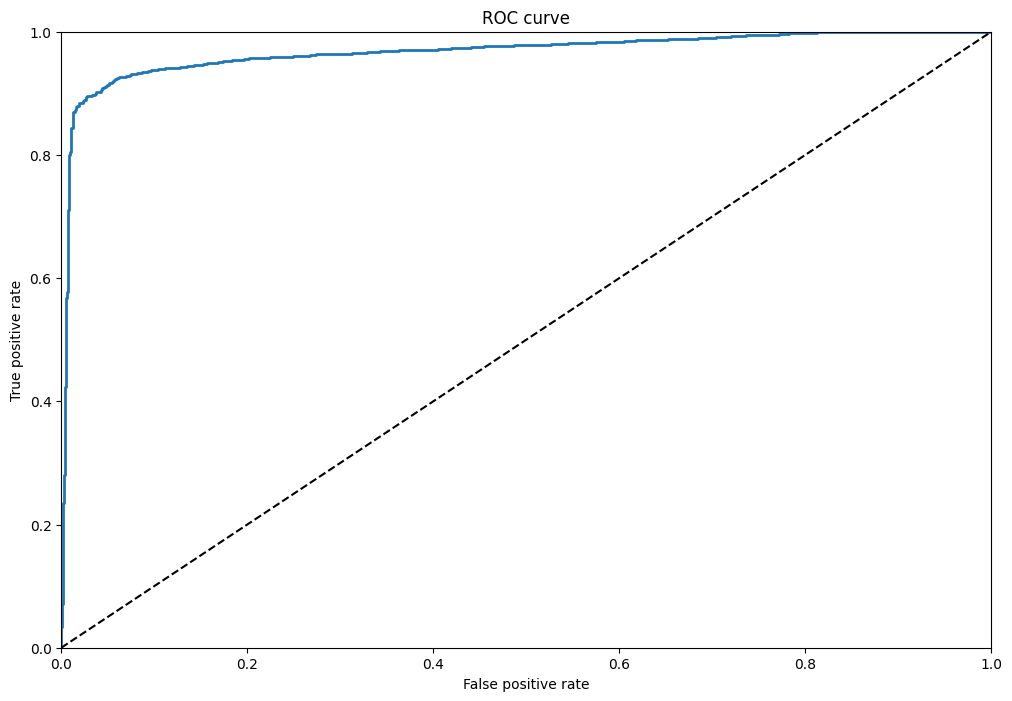

In [63]:
y_scores = cross_val_predict(svc, X_train_scaled, y_train, cv=5,method='decision_function')
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr,tpr)
plt.show()

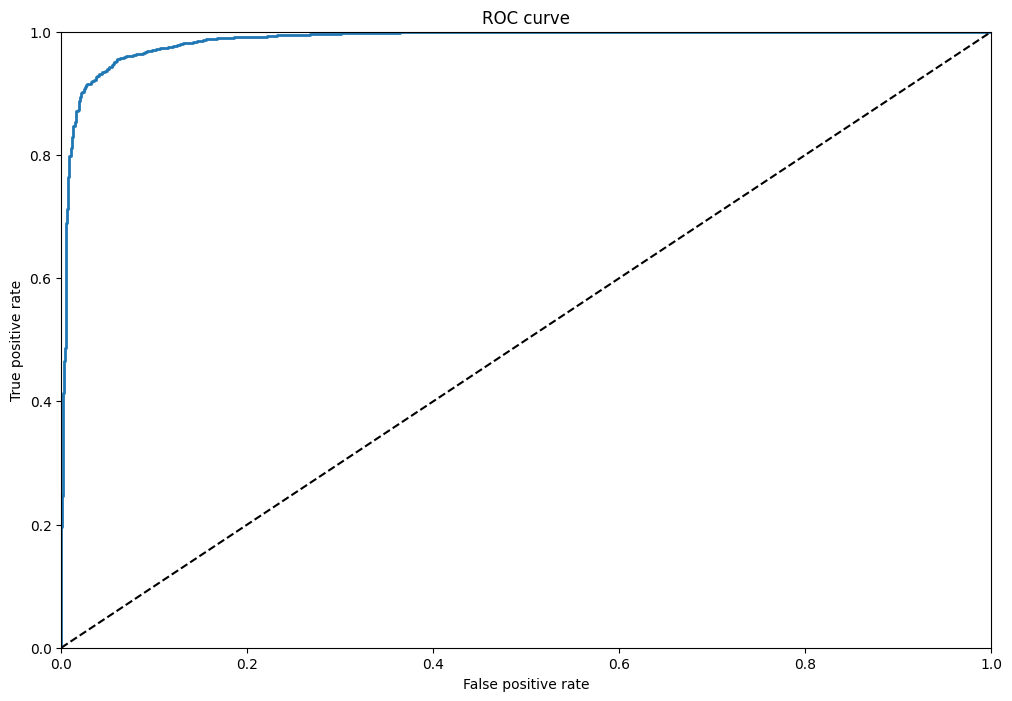

In [64]:
y_scores = cross_val_predict(best_svm_grid, X_train_scaled, y_train, cv=5,method='decision_function')
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr,tpr)
plt.show()

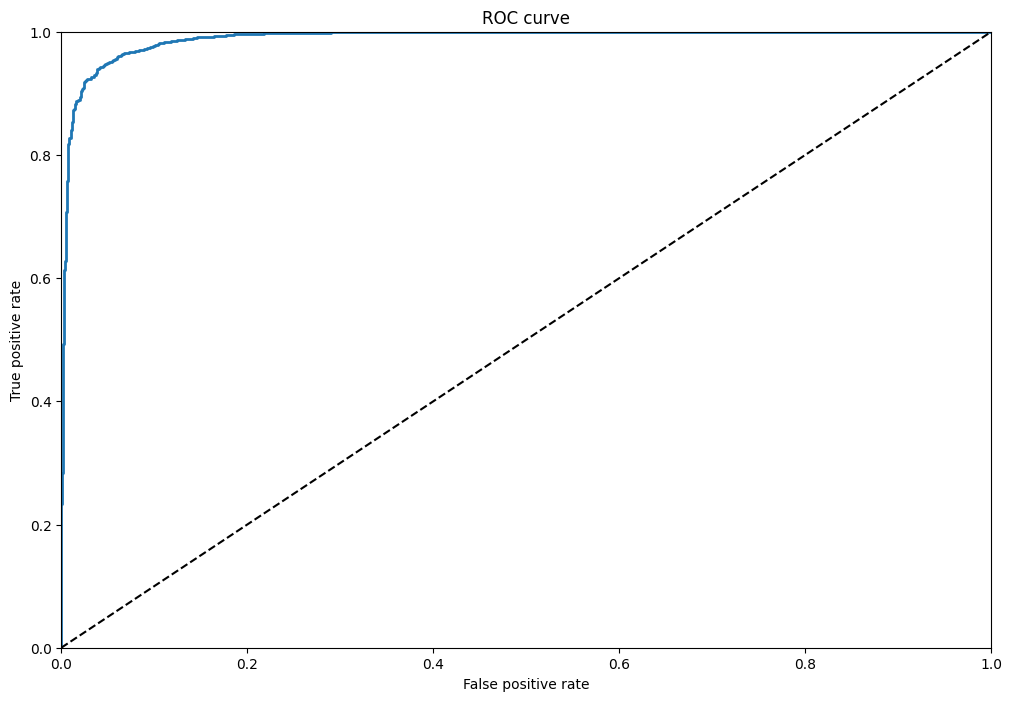

In [65]:
y_scores = cross_val_predict(best_svc_rdm, X_train_scaled, y_train, cv=5,method='decision_function')
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr,tpr)
plt.show()

In [66]:
#we need to make a function that finds out the score of our training and testing
def M_S(y_real, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_real, y_pred),
                      'precision': precision_score(y_real, y_pred,),
                      'recall': recall_score(y_real, y_pred,),
                      'f1': f1_score(y_real, y_pred,)},
                      name=label)

In [67]:
#we need to know The error on the training and test data sets
y_train_pred = svc.predict(X_train_scaled)
y_test_pred = svc.predict(X_test_scaled)

train_test_full_error = pd.concat([M_S(y_train, y_train_pred, 'train'),M_S(y_test, y_test_pred, 'test')],axis=1)
train_test_full_error

,train,test
accuracy,0.927965,0.916862
precision,0.948755,0.942857
recall,0.934434,0.923507
f1,0.941540,0.933082


In [68]:
#we need to know The error on the training and test data sets
y_train_pred = best_svm_grid.predict(X_train_scaled)
y_test_pred = best_svm_grid.predict(X_test_scaled)

train_test_full_error = pd.concat([M_S(y_train, y_train_pred, 'train'),M_S(y_test, y_test_pred, 'test')],axis=1)
train_test_full_error

,train,test
accuracy,0.980381,0.939110
precision,0.984884,0.956604
recall,0.983491,0.945896
f1,0.984187,0.951220


In [69]:
y_train_pred = best_svc_rdm.predict(X_train_scaled)
y_test_pred = best_svc_rdm.predict(X_test_scaled)

train_test_full_error = pd.concat([M_S(y_train, y_train_pred, 'train'),M_S(y_test, y_test_pred, 'test')],axis=1)
train_test_full_error

,train,test
accuracy,0.981845,0.944965
precision,0.986295,0.957009
recall,0.984434,0.955224
f1,0.985364,0.956116


In [70]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test_scaled)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

model_path = "decision_tree.joblib"
dump(random_search, model_path)

['decision_tree.joblib']

Accuracy: 0.977751756440281


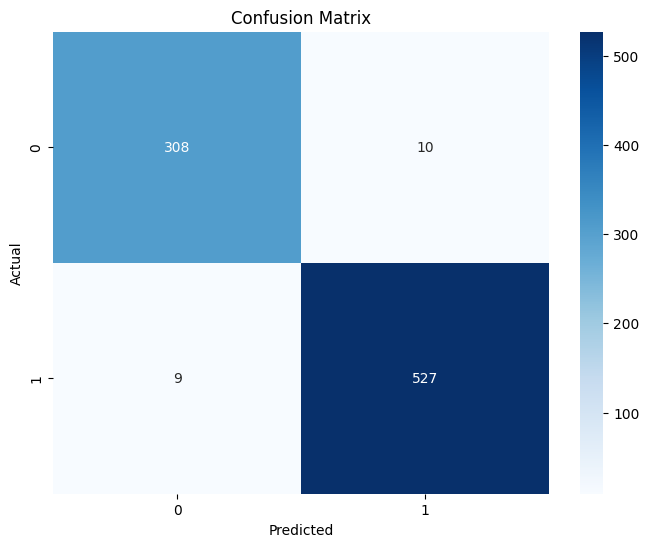

Decision Tree Classifier Metrics:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [71]:
# Plot the confusion matrix

print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print(classification_report(y_test, y_pred))

In [72]:
y_train_pred = decision_tree.predict(X_train_scaled)
y_test_pred = decision_tree.predict(X_test_scaled)

train_test_full_error = pd.concat([M_S(y_train, y_train_pred, 'train'),M_S(y_test, y_test_pred, 'test')],axis=1)
train_test_full_error

,train,test
accuracy,1.0,0.977752
precision,1.0,0.981378
recall,1.0,0.983209
f1,1.0,0.982293


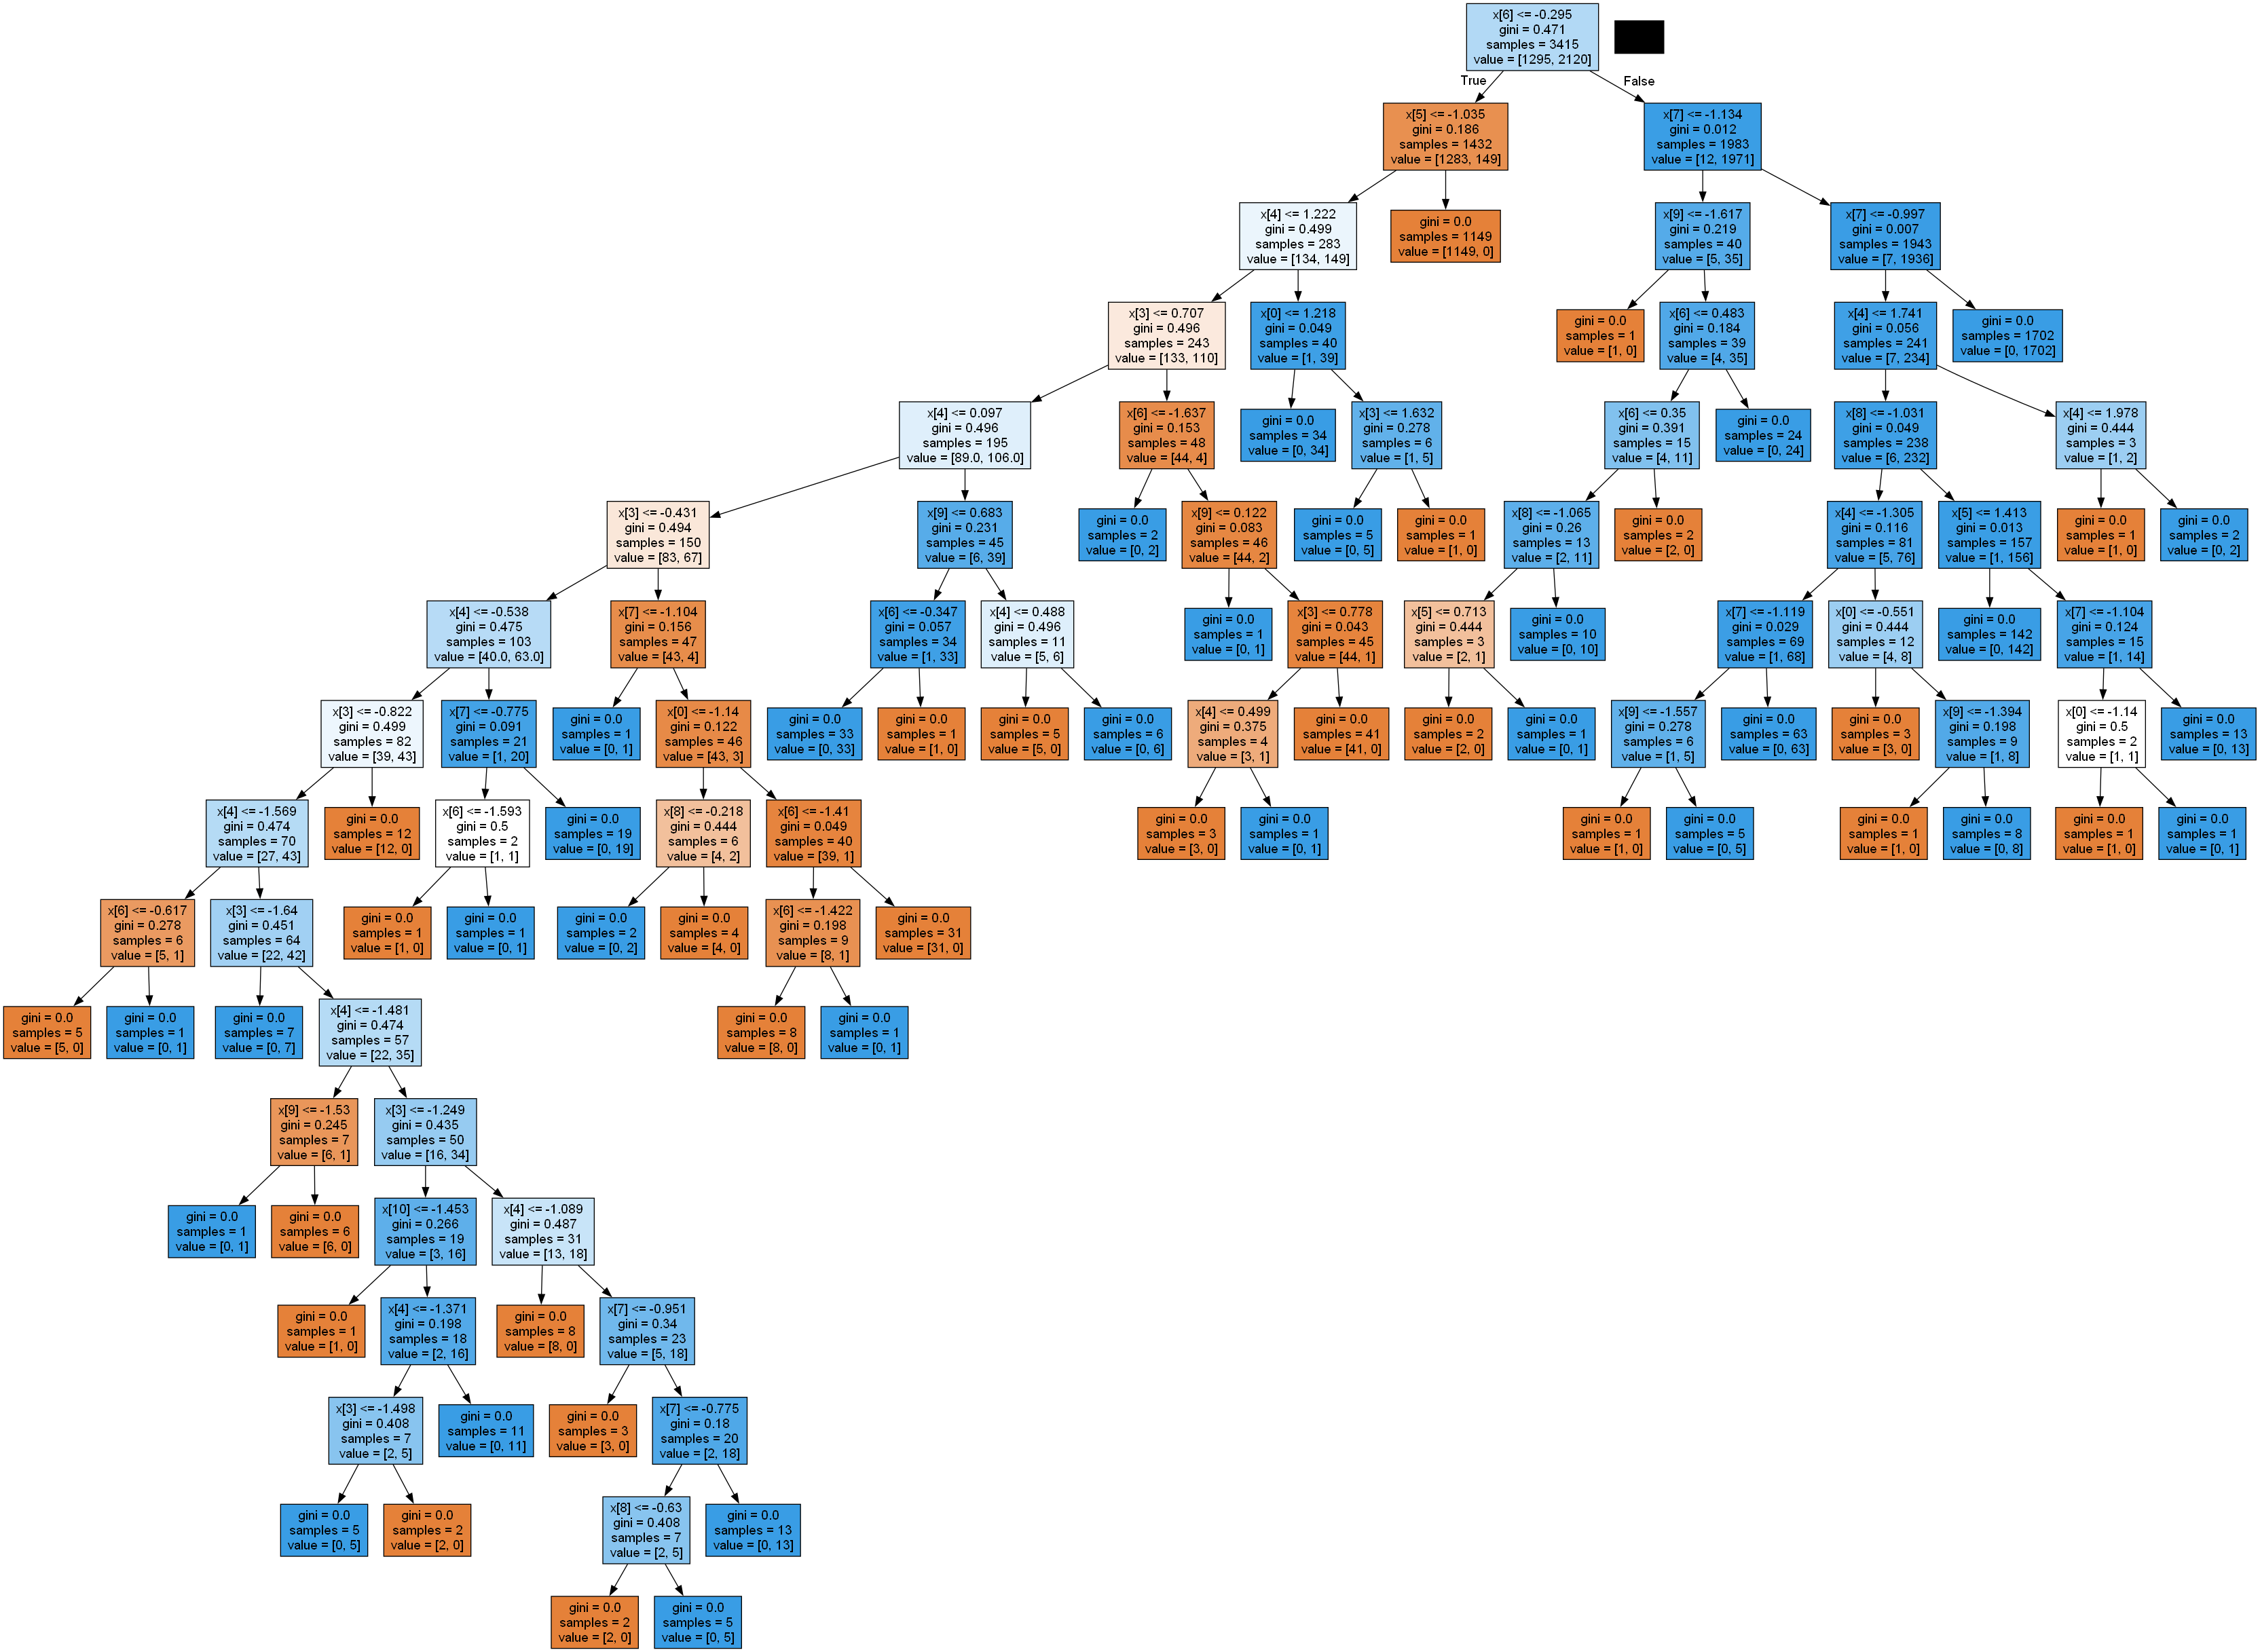

In [73]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(decision_tree, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the decision tree image
filename = 'loan_tree.png'
graph.write_png(filename)
img = Image(filename=filename)
display(img)

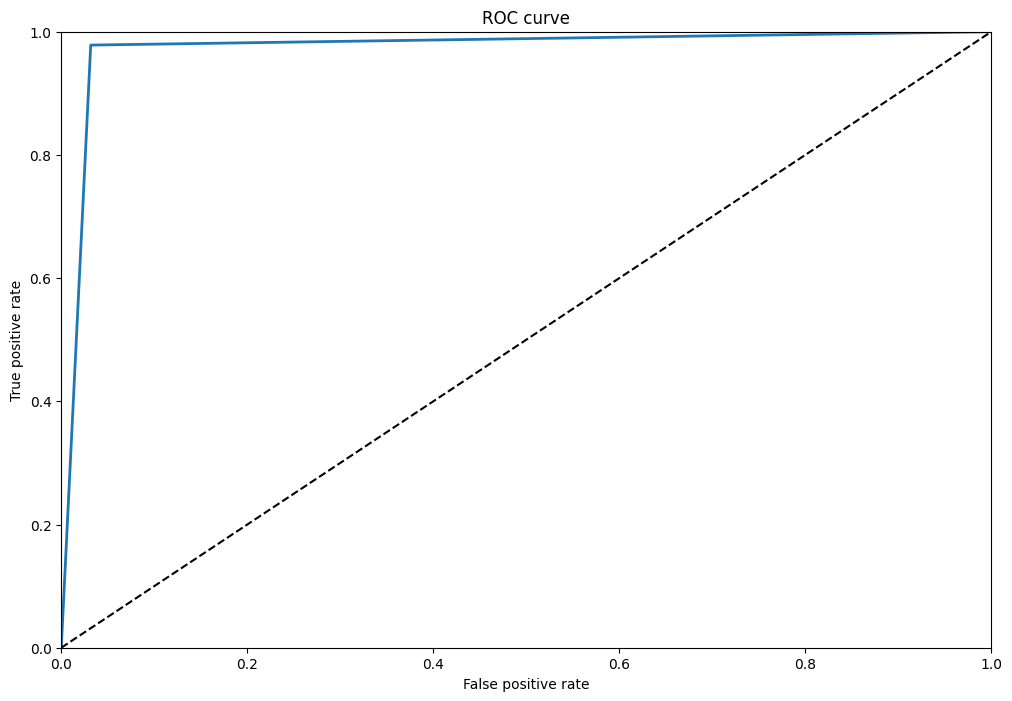

In [74]:
y_scores = cross_val_predict(decision_tree, X_train_scaled, y_train, cv=5,method='predict_proba')
# Get decision scores for the positive class (class 1)
y_scores = y_scores[:, 1]
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr,tpr)
plt.show()